In [13]:
from proteus.iproteus import * 
from proteus import default_n, default_s, default_so
Profiling.logLevel=5
Profiling.verbose=False

load_macros("macros.tex")


# switches for which outputs we want of videos
outputVelocity = False
outputPressure = True
outputDensity = True
outputSolutions = False

# switch to save animations as mp4 if it is possible (you have ffmpeg or mencoder installed)
# we check for the availability of these encoders below

make_movie = False
print 'make_movie = %r' %make_movie

$\newcommand{\C}{\mathbb{C}}$
$\newcommand{\Du}{\underline{D}}$
$\newcommand{\veps}{\varepsilon}$
$\newcommand{\eps}{\epsilon}$
$\newcommand{\f}{\textbf{f}}$
$\newcommand{\fb}{\textbf{f}}$
$\newcommand{\F}{\mathbb{F}}$
$\newcommand{\Fb}{\textbf{F}}$
$\newcommand{\gb}{\textbf{g}}$
$\newcommand{\h}{\textbf{h}}$
$\newcommand{\kb}{\textbf{k}}$
$\newcommand{\M}{\mathcal{M}}$
$\newcommand{\N}{\mathbb{N}}$
$\newcommand{\Norm}{\textbf{N}}$
$\newcommand{\n}{\textbf{n}}$
$\newcommand{\vp}{\varphi}$
$\newcommand{\vph}{\hat{\varphi}}$
$\newcommand{\p}{\phi}$
$\newcommand{\Proj}{\mathbb{P}}$
$\newcommand{\Pcal}{\mathcal{P}}$
$\newcommand{\Q}{\mathbb{Q}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\rb}{\textbf{r}}$
$\newcommand{\s}[1]{\mathcal{#1}}$
$\newcommand{\supp}{\text{supp}}$
$\newcommand{\Surf}{\textbf{S}}$
$\newcommand{\tpsi}{\tilde{\psi}}$
$\newcommand{\ub}{\textbf{u}}$
$\newcommand{\U}{\textbf{U}}$
$\newcommand{\vb}{\textbf{v}}$
$\newcommand{\V}{\mathbb{V}}$
$\newcommand{\wb}{\textbf{w}}$
$\newcommand{\x}{\textbf{x}}$
$\newcommand{\xh}{\hat{x}}$
$\newcommand{\X}{\textbf{X}}$
$\newcommand{\y}{\textbf{y}}$
$\newcommand{\yh}{\hat{y}}$
$\newcommand{\Y}{\textbf{Y}}$
$\newcommand{\Z}{\mathbb{Z}}$
$\DeclareMathOperator{\sech}{sech}$
$\DeclareMathOperator{\atanh}{atanh}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\tr}{Trace}$
$\DeclareMathOperator{\gradsymm}{\nabla_{s}}$
$\DeclareMathOperator{\divergence}{div}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator*{\argmin}{argmin}$
$\DeclareMathOperator*{\argmax}{argmax}$
$\DeclareMathOperator{\Span}{Span}$
$\DeclareMathOperator{\rank}{rank}$
$\newcommand{\br}[1]{\left\langle #1 \right\rangle}$
$\newcommand{\paren}[1]{\left(#1\right)}$
$\newcommand{\sq}[1]{\left[#1\right]}$
$\newcommand{\set}[1]{\left\{\: #1 \:\right\}}$
$\newcommand{\setp}[2]{\left\{\, #1\: \middle|\: #2 \, \right\}}$
$\newcommand{\abs}[1]{\left| #1 \right|}$
$\newcommand{\norm}[1]{\left\| #1 \right\|}$
$\newcommand{\system}[1]{\left\{ \begin{array}{rl} #1 \end{array} \right.}$
$\newcommand{\pf}[2]{\frac{\partial #1}{\partial #2}}$
$\newcommand{\ipt}[2]{\langle #1,#2 \rangle}$
$\newcommand{\ip}{\int_{-\infty}^{+\infty}}$
$\renewcommand{\ker}[1]{\mathcal{N}(#1)}$
$\newcommand{\ran}[1]{\mathcal{R}(#1)}$


make_movie = False


## Problem Description

Solve the 2D Navier-Stokes equation on a square domain.  That is, find density $\rho>0$, velocity field $\mathbf{v}:\Omega \rightarrow \mathbb{R} \times \mathbb{R}^2$ and pressure $p:\Omega\rightarrow\R$ such that

$$
\begin{equation}
\begin{cases}
\rho_t + \nabla\cdot(\rho\vb) = 0,&\\
\rho\left(\frac{\partial \vb}{\partial t} + \vb\cdot\nabla\vb\right) +  \nabla p  - \nabla \cdot \left(\mu \nabla\vb\right) = \fb(x,t),&\\
\nabla \cdot \vb  = 0,&
\end{cases}
\end{equation}
$$

on domain $\Omega = [0,1]^2$ and time interval $[0,T].$ Here $\mathbf{f}(x,t)$ is a smooth external force and the dynamic viscosity, $\mu>0$, is constant. 

Let $\partial\Omega^{in} = \{\x\in\partial\Omega \:|\: \vb\cdot \n < 0 \}$ be the inflow boundary.  We supplement the above system with initial conditions for density and velocity and inflow boundary conditions for density and dirichlet boundary conditions for velocity.

$$
\begin{equation}
  \begin{cases}
    \rho(\x,0) = \rho_0(\x),&\\
    \vb(\x,0) = \vb_0(\x),&
  \end{cases}
\end{equation}
$$
and
$$
\begin{equation}
  \begin{cases}
    \left.\rho(\x,t)\right|_{\partial\Omega^{in}} = \rho^{in}(\x,t),&\\
    \left.\vb(\x,t)\right|_{\partial\Omega} = b(\x,t),&
  \end{cases}
\end{equation}
$$

If $b(\x,t)=0$ then our boundary is impermeable and $\partial\Omega^{in} = \emptyset$.  However if we do allow for non zero boundary conditions for velocity, then our inflow set could be non empty.

We can add inflow boundary conditions for the pressure term as well until we do our splitting in which case pressure will be fixed by our intermediate steps.

###Manufactured Solution
Setup the problem by method of manufactured solution.

We will introduce a specific example that we have implemented, but we use sympy to symbolically compute the source terms based on the navier stokes equation as defined above.  In order to change the solution, it is only necessary to update p and v below.


A specific solution to 2D navier-stokes equation given by Guermond and Salgado is (using $\rb = (r,\theta)$ as shortcut notation )

$$
\rho(\rb,t) = 2+r\cos(\theta-\sin(t)),
$$

$$
p(\x,t) = \sin(x)\sin(y)\sin(t),
$$

and

$$
v(\x,t) = (-y,x)^{T}\cos(t)
$$

with

$$
f(\x,t) =
\left(\begin{split}
 &\left(y\sin(t) - x\cos^2(t)\right)\rho(\rb,t) + \cos(x)\sin(y)\sin(t)\\
         -&\left(x\sin(t)+y\cos^2(t)\right)\rho(\rb,t) + \sin(x)\cos(y)\sin(t)
\end{split}\right)
$$

which we solve on the time domain $t\in [0,10].$


After we have used Sympy to find the various source terms, we lambdify them to get a numpy function and then build a wrapper to transform the input that proteus gives into something usable.  Note that the x array for the quadrature points will be a multidimensional array. The last dimension will be 3 always though.

In [14]:
import variable_density2D.guermond_example_variable_density_so as so
display_src(so)

```Python
from proteus.default_so import *
from proteus import Context
import guermond_example_variable_density
Context.setFromModule(guermond_example_variable_density)
ctx = Context.get()

pnList = [("rho_p", "rho_n"),
          ("mom_p", "mom_n")]

name = "guermond_example_variable_density_p"

# modelSpinUpList = [0,1] # for model [1] take a step and then rewind time to time t^0 and proceed as usual
 
systemStepControllerType = Sequential_MinAdaptiveModelStep  # uses minimal time step from each _n model
# systemStepControllerType = Sequential_FixedStep_Simple # uses time steps in so.tnList

needEBQ_GLOBAL = False
needEBQ = False

tnList = ctx.tnList

```


In [15]:
from proteus import Comm
import os
from importlib import import_module

pList=[]
nList=[]
so.sList=[]
for (p,n) in so.pnList:
    so.sList.append(default_s)
    pList.append(import_module('variable_density2D.'+p))
    nList.append(import_module('variable_density2D.'+n))
    pList[-1].name = p
opts.save_dof = True
opts.dataDir='.'
opts.probDir='.'
Profiling.logLevel=3
Profiling.verbose=False


In [16]:
ns = NumericalSolution.NS_base(so, pList, nList, so.sList, opts)
ns.calculateSolution('run1')

TriangleBaseMesh nbase=1 baseFlags= VApq30Dena0.00789568 
fluxBoundaryCondition_components set([0])
fluxBoundaryCondition_components set([0, 1, 2])


False

### Import all the packages and tools needed to plot and analyze the solutions

In [17]:
import numpy as np

import matplotlib
matplotlib.use('svg')
%matplotlib inline
# matplotlib.pylab.rcParams['figure.figsize'] = 16, 12
from matplotlib import  pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from tables import openFile

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

/Users/srobertp/software/proteus/darwin/lib/python2.7/site-packages/matplotlib/__init__.py:1312: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Error analysis
Calculate the maximal values and maximal errors of computed quantities for plotting below

In [18]:

# initialize the values to be calculated        
velocity_max = -float("inf")  
velocity_min = float("inf")
pressure_max = -float("inf")
pressure_min = float("inf")
density_max = -float("inf")
density_min = float("inf")

velocity_diff_max = -float("inf")
velocity_diff_min = float("inf")
pressure_diff_max = -float("inf")
pressure_diff_min = float("inf")
density_diff_max = -float("inf")
density_diff_min = float("inf")

# loop through solutions and calculate the errors and extrema
for i in np.arange(len(so.ctx.tnList)):
    h5=openFile("guermond_example_variable_density_p0.h5","r")        
    t = so.ctx.tnList[i]
    xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
    n = xvals.shape[0]
    
    u = h5.getNode("/u%i" %i)[:n]
    u_true = so.ctx.utrue(xvals,t)
    v = h5.getNode("/v%i" %i)[:n]
    v_true = so.ctx.vtrue(xvals,t)
    p = h5.getNode("/p%i" %i)[:]
    p_true = so.ctx.ptrue(xvals,t)
    rho = h5.getNode("/rho%i" %i)[:n]
    rho_true = so.ctx.rhotrue(xvals,t)
    
    u_diff = u-u_true
    v_diff = v-v_true
    p_diff = p-p_true
    rho_diff = rho-rho_true
    
    h5.close()

    # calculate the max and minima over entire solution output time
    velocity_max = max(velocity_max, max(u), max(v))        
    velocity_min = min(velocity_min, min(u), min(v)) 
    pressure_max = max(pressure_max, max(p))
    pressure_min = min(pressure_min, min(p)) 
    density_max = max(density_max, max(rho))
    density_min = min(density_min, min(rho)) 

    # calculate maximal errors
    velocity_diff_max = max(velocity_diff_max, max(u_diff), max(v_diff))
    velocity_diff_min = min(velocity_diff_min, min(u_diff), min(v_diff))

    pressure_diff_max = max(pressure_diff_max, max(p_diff))
    pressure_diff_min = min(pressure_diff_min, min(p_diff))

    density_diff_max = max(density_diff_max, max(rho_diff))
    density_diff_min = min(density_diff_min, min(rho_diff))

# now we have errors calculated, output them
print "max velocity = %2.4f,\t min velocity = %2.4f" %(velocity_max, velocity_min)
print "max pressure = %2.4f,\t min pressure = %2.4f" %(pressure_max, pressure_min)
print "max density = %2.4f,\t min density = %2.4f" %(density_max, density_min)

print "Discrete maximum norms (evaluated at nodal points):"
print "\t||v||_{max}\t= %2.4e" %max(np.abs(velocity_diff_max),np.abs(velocity_diff_min))
print "\t||p||_{max}\t= %2.4e" %max(np.abs(pressure_diff_max),np.abs(pressure_diff_min))
print "\t||rho||_{max}\t= %2.4e" %max(np.abs(density_diff_max),np.abs(density_diff_min))


max velocity = 1.0000,	 min velocity = -1.0000
max pressure = 0.4209,	 min pressure = -0.4209
max density = 3.0000,	 min density = 1.0000
Discrete maximum norms (evaluated at nodal points):
	||v||_{max}	= 4.2243e-03
	||p||_{max}	= 4.7942e-02
	||rho||_{max}	= 1.6330e-01


##Plotting and Animations

Check to see if ffmpeg or mencoder are available for creating mp4 video of animations
and whether or not to produce the mp4 movies

In [19]:
cmd_exists = lambda x: any(os.access(os.path.join(path, x), os.X_OK) for path in os.environ["PATH"].split(os.pathsep))
ffmpeg_is_available = cmd_exists('ffmpeg')
print 'ffmpeg_is_available = %r' %ffmpeg_is_available
mencoder_is_available = cmd_exists('mencoder')
print 'mencoder_is_available = %r' %mencoder_is_available


ffmpeg_is_available = True
mencoder_is_available = False


###Plot the velocity errors

In [20]:
if outputVelocity:
    # setup initial figure spacing and create frames for input
    fig = plt.figure(figsize=(11,6.5)) # w, h in inches

    axvelerr = fig.add_subplot(231)
    axu = fig.add_subplot(232)
    axv = fig.add_subplot(233)
    axvelquiv = fig.add_subplot(234)
    axeu = fig.add_subplot(235)
    axev = fig.add_subplot(236)

    axvelerr.set_aspect('equal')
    axvelquiv.set_aspect('equal')
    axu.set_aspect('equal')
    axv.set_aspect('equal')
    axeu.set_aspect('equal')
    axev.set_aspect('equal')

    axvelerr.set_title('$\\|\\vec{v} - \\vec{v}_{true}\\|_{\ell_2}$')
    axvelquiv.set_title('velocity')
    axu.set_title('computed u')
    axv.set_title('computed v')
    axeu.set_title('exact u')
    axev.set_title('exact v')

    fig.tight_layout() # spread out the plots so that they don't overlap

    # adjust plots to make room for colorbars
    fig.subplots_adjust(right=0.8,top=0.98,left=0.15)
    cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar_ax_left = fig.add_axes([0.0, 0.15, 0.05, 0.7])


    title = fig.suptitle("",x=0.5, y=1.00,
             horizontalalignment='center',
             fontsize=14,)

    velocity_ell2_max = np.sqrt(2)*max(np.abs(velocity_diff_max),np.abs(velocity_diff_min))

    # normalization parameters for plots to make colors consistent across plots
    norm_velerr = plt.Normalize(vmin=0.0,vmax=velocity_ell2_max)
    norm_vel = plt.Normalize(vmin=velocity_min,vmax=velocity_max)

    # create scalar mappables that we will use for the colorbars to show entire range
    # of colors instead of have them be autoscaled at each time step
    #
    # Thus the colorbars will be static instead of adapted to each shown plot
    velerrfullrange = np.linspace(0.0,velocity_ell2_max,10)
    vfullrange = np.linspace(velocity_min,velocity_max,10)

    sm_velerr = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_velerr)
    sm_velerr.set_array(velerrfullrange)

    sm_vel = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_vel)
    sm_vel.set_array(vfullrange)


    def init():
        c_velerr = axvelerr.plot([],[])
        c_velquiv = axvelquiv.plot([],[])
        c_u = axu.plot([],[])
        c_v = axv.plot([],[])
        c_eu = axeu.plot([],[])
        c_ev = axev.plot([],[])
        return (c_u,c_v,c_eu,c_ev,c_velquiv,c_velerr)


    def animate(i):
        # time
        t = so.ctx.tnList[i]
        title.set_text("t = %.2f" %t)

        h5=openFile("guermond_example_variable_density_p0.h5","r")        
        triangles = h5.getNode("/elementsSpatial_Domain%i" %i)
        xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
        n = xvals.shape[0]

        u = h5.getNode("/u%i" %i)[:n]
        v = h5.getNode("/v%i" %i)[:n]
        u_true = so.ctx.utrue(xvals,t)
        v_true = so.ctx.vtrue(xvals,t)

        vel_error = np.sqrt(pow(u-u_true,2.) + pow(v-v_true,2.))

        c_velerr = axvelerr.tricontourf(xvals[:,0],xvals[:,1], triangles, vel_error, norm=norm_velerr)
        axvelquiv.cla() # clear quiver axes explicitly since it doesn't seem to do it on its own
        c_velquiv = axvelquiv.quiver(xvals[:,0],xvals[:,1],u,v,angles='xy',scale=10)
        axvelquiv.set_title('computed velocity')    
        c_u = axu.tricontourf(xvals[:,0],xvals[:,1], triangles, u, norm=norm_vel)
        c_eu = axeu.tricontourf(xvals[:,0],xvals[:,1], triangles, u_true, norm=norm_vel)    
        c_v = axv.tricontourf(xvals[:,0],xvals[:,1], triangles, v, norm=norm_vel)
        c_ev = axev.tricontourf(xvals[:,0],xvals[:,1], triangles, v_true, norm=norm_vel)

        cbar_left = fig.colorbar(sm_velerr,cax=cbar_ax_left, norm=norm_velerr)  # static colorbar
        cbar_left.set_label("velocity norm error")

        cbar_right = fig.colorbar(sm_vel, cax=cbar_ax_right, norm=norm_vel)
        cbar_right.set_label("velocity")

        h5.close()
    #     plt.show() # force the legends and formatting to show up

        return (c_u,c_v,c_eu,c_ev,c_velquiv,c_velerr)

    # generate an animation from the data using the matplotlib.animation.FuncAnimation() function
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                            frames=len(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

    # Now if possible, save movie as velocity_animation.mp4
    if (ffmpeg_is_available or mencoder_is_available) and make_movie:
        # save the animation as an mp4.  This requires ffmpeg or mencoder to be
        # installed.  The extra_args ensure that the x264 codec is used, so that
        # the video can be embedded in html5.  You may need to adjust this for
        # your system: for more information, see
        # http://matplotlib.sourceforge.net/api/animation_api.html
        anim.save('velocity_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264','-pix_fmt', 'yuv420p']) #fps=30

    # by saving the animation as anim, we suppress the html display modified by the JSanimation package
    # so we explicitly call the display function in JSanimation as the last thing with our anim object
    IPython_display.display_animation(anim)

###Plot the Pressure Errors

In [21]:
if outputPressure:
    fig = plt.figure(figsize=(8,6)) # w, h in inches
    axp = fig.add_subplot(221)
    axep = fig.add_subplot(223)
    axpdiff = fig.add_subplot(222)
    axperr = fig.add_subplot(224)

    fig.tight_layout() # spread out the plots so that they don't overlap
    fig.subplots_adjust(left=0.15, right=0.8,top=0.95)

    cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar_ax_left = fig.add_axes([0.0, 0.15, 0.05, 0.7])

    title = fig.suptitle("",x=0.5, y=1.0,
             horizontalalignment='center',
             fontsize=14,)

    axp.set_aspect('equal')
    axep.set_aspect('equal')
    axpdiff.set_aspect('equal')
    axperr.set_aspect('equal')

    axp.set_title('computed p')
    axep.set_title('exact p')
    axpdiff.set_title('diff p = $p-p_{true}$ ')
    axperr.set_title('error p = $|p-p_{true}|$')

    # normalization parameters for plots to make colors consistent across plots
    norm_p = plt.Normalize(vmin=pressure_min,vmax=pressure_max)
    norm_pdiff = plt.Normalize(vmin=pressure_diff_min,vmax=pressure_diff_max)

    # create scalar mappables that we will use for the colorbars to show entire range
    # of colors instead of have them be autoscaled at each time step
    #
    # Thus the colorbars will be static instead of adapted to each shown plot
    pfullrange = np.linspace(pressure_min,pressure_max,10)
    pdifffullrange = np.linspace(pressure_diff_min,pressure_diff_max,10)

    sm_p = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_p)
    sm_p.set_array(pfullrange)

    sm_pdiff = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_pdiff)
    sm_pdiff.set_array(pdifffullrange)

    # create animation plots
    def init():
        c_p = axp.plot([],[])
        c_ep = axep.plot([],[])
        c_pdiff = axpdiff.plot([],[])
        c_perr = axperr.plot([],[])
        return (c_p, c_ep, c_pdiff, c_perr)

    def animate(i):
        # time
        t = so.tnList[i]
        title.set_text("t = %.2f" %t)

        h5=openFile("guermond_example_variable_density_p0.h5","r") 

        # density
        xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
        n = xvals.shape[0]
        triangles = h5.getNode("/elementsSpatial_Domain%i" %i)[:]

        p = h5.getNode("/p%i" %i)[:]
        p_true = so.ctx.ptrue(xvals,t)

        pdiff = p-p_true
        perr = np.abs(pdiff)

        c_p = axp.tricontourf(xvals[:,0],xvals[:,1], triangles, p, norm=norm_p)
        c_ep = axep.tricontourf(xvals[:,0],xvals[:,1], triangles, p_true, norm=norm_p)
        c_pdiff = axpdiff.tricontourf(xvals[:,0],xvals[:,1],triangles,pdiff, norm=norm_pdiff)
        c_perr = axperr.tricontourf(xvals[:,0],xvals[:,1],triangles,perr, norm=norm_pdiff)

        cbar_left = fig.colorbar(sm_p,cax=cbar_ax_left, norm=norm_p)
        cbar_left.set_label("pressure")

        cbar_right = fig.colorbar(sm_pdiff, cax=cbar_ax_right, norm=norm_pdiff)
        cbar_right.set_label("pressure diff")

        h5.close()
    #     plt.show() # force the legends and formatting to show up

        return (c_p, c_ep, c_pdiff, c_perr)


    # generate an animation from the data using the matplotlib.animation.FuncAnimation() function
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                            frames=len(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

    # Now if possible, save movie as velocity_animation.mp4
    if (ffmpeg_is_available or mencoder_is_available) and make_movie:
        # save the animation as an mp4.  This requires ffmpeg or mencoder to be
        # installed.  The extra_args ensure that the x264 codec is used, so that
        # the video can be embedded in html5.  You may need to adjust this for
        # your system: for more information, see
        # http://matplotlib.sourceforge.net/api/animation_api.html
        anim.save('pressure_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264','-pix_fmt', 'yuv420p']) #fps=30

    # by saving the animation as anim, we suppress the html display modified by the JSanimation package
    # so we explicitly call the display function in JSanimation as the last thing with our anim object
    IPython_display.display_animation(anim)

###Plot Triangulation

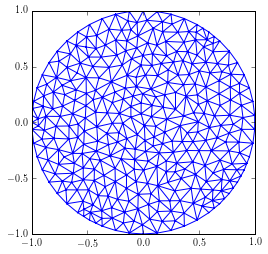

In [22]:
fig_mesh = plt.figure(figsize=(4,4)) # w, h in inches
h5=openFile("guermond_example_variable_density_p0.h5","r") 
nodes = h5.getNode("/nodesSpatial_Domain%i" %0)[:]
triangles = h5.getNode("/elementsSpatial_Domain%i" %0)[:]
plt.triplot(nodes[:,0],nodes[:,1],triangles)
plt.axis('equal')
# close the table file after extracting all the solutions for the movie above
h5.close()

###Plot the density errors

In [23]:
if outputDensity:
    fig = plt.figure(figsize=(8,6)) # w, h in inches
    axrho = fig.add_subplot(222)
    axrhoerr = fig.add_subplot(221)
    axvel = fig.add_subplot(224)
    axrhodiff = fig.add_subplot(223)


    fig.tight_layout() # spread out the plots so that they don't overlap
    fig.subplots_adjust(right=0.8,top=0.95,left=0.15)

    cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar_ax_left = fig.add_axes([0.0, 0.15, 0.05, 0.7])

    title = fig.suptitle("",x=0.5, y=1.0,
             horizontalalignment='center',
             fontsize=14,)

    axrho.set_aspect('equal')
    axrhoerr.set_aspect('equal')
    axvel.set_aspect('equal')
    axrhodiff.set_aspect('equal')

    axrho.set_title('computed $\\rho$')
    # axerho.set_title('exact $\\rho$')
    axrhoerr.set_title('$\\rho$ error = $|\\rho - \\rho_{ex}|$')
    axrhodiff.set_title('$\\rho$ diff = $\\rho - \\rho_{ex}$')
    axvel.set_title('computed velocity')

    # normalization parameters for plots to make colors consistent across plots
    norm_rho = plt.Normalize(vmin=density_min,vmax=density_max)
    norm_rhodiff = plt.Normalize(vmin=density_diff_min,vmax=density_diff_max)

    # create scalar mappables that we will use for the colorbars to show entire range
    # of colors instead of have them be autoscaled at each time step
    #
    # Thus the colorbars will be static instead of adapted to each shown plot
    rhofullrange = np.linspace(density_min,density_max,10)
    rhodifffullrange = np.linspace(density_diff_min,density_diff_max,10)

    sm_rhodiff = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_rhodiff)
    sm_rhodiff.set_array(rhodifffullrange)

    sm_rho = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_rho)
    sm_rho.set_array(rhofullrange)


    # create animation plots

    def init():
        t = so.tnList[0]
        title.set_text("t = %.2f" %t)

        h5=openFile("guermond_example_variable_density_p0.h5","r") 
        xvals = h5.getNode("/nodesSpatial_Domain%i" %0)[:]
        n = xvals.shape[0]
        triangles = h5.getNode("/elementsSpatial_Domain%i" %0)[:]
        u = h5.getNode("/u%i" %0)[:n]
        v = h5.getNode("/v%i" %0)[:n]
        rho_comp = h5.getNode("/rho%i" %0)[:n]
        rho_true = so.ctx.rhotrue(xvals,t)
        h5.close()

        c_rhodiff = axrhodiff.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_true, norm=norm_rhodiff)
        c_rho = axrho.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_comp, norm=norm_rho)
        c_rhoerr = axrhoerr.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_true, norm=norm_rhodiff)
        c_vel = axvel.quiver(xvals[:,0],xvals[:,1],u,v,angles='xy',scale=10)
        axvel.set_title('computed velocity')
        return (c_rho, c_rhodiff,c_vel,c_rhoerr)

    def animate(i):
        # time
        t = so.tnList[i]
        title.set_text("t = %.2f" %t)

        h5=openFile("guermond_example_variable_density_p0.h5","r") 

        # density
        xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
        n = xvals.shape[0]
        triangles = h5.getNode("/elementsSpatial_Domain%i" %i)[:]

        u = h5.getNode("/u%i" %i)[:n]
        v = h5.getNode("/v%i" %i)[:n]

        rho = h5.getNode("/rho%i" %i)[:n]
        rho_true = so.ctx.rhotrue(xvals,t)

        rho_diff = rho-rho_true
        rho_err = np.abs(rho-rho_true)

        c_rho = axrho.tricontourf(xvals[:,0],xvals[:,1],triangles,rho, norm=norm_rho)
        c_rhodiff = axrhodiff.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_diff, norm=norm_rhodiff)
        c_rhoerr = axrhoerr.tricontourf(xvals[:,0],xvals[:,1],triangles,rho_err, norm=norm_rhodiff)
        axvel.cla() # clear quiver axes explicitly since it doesn't seem to do it on its own
        c_vel = axvel.quiver(xvals[:,0],xvals[:,1],u,v,angles='xy',scale=10)
        axvel.set_title('computed velocity')

        cbar_right = fig.colorbar(sm_rho, cax=cbar_ax_right, norm=norm_rho)
        cbar_right.set_label("density")

        cbar_left = fig.colorbar(sm_rhodiff,cax=cbar_ax_left, norm=norm_rhodiff)
        cbar_left.set_label("$\\rho$ diff")

        h5.close()
    #     plt.show() # force the legends and formatting to show up

        return (c_rho, c_rhoerr, c_vel,c_rhodiff)


    # generate an animation from the data using the matplotlib.animation.FuncAnimation() function
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                            frames=len(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

    # Now if possible, save movie as velocity_animation.mp4
    if (ffmpeg_is_available or mencoder_is_available) and make_movie:
        # save the animation as an mp4.  This requires ffmpeg or mencoder to be
        # installed.  The extra_args ensure that the x264 codec is used, so that
        # the video can be embedded in html5.  You may need to adjust this for
        # your system: for more information, see
        # http://matplotlib.sourceforge.net/api/animation_api.html
        anim.save('density_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264','-pix_fmt', 'yuv420p']) #fps=30

    # by saving the animation as anim, we suppress the html display modified by the JSanimation package
    # so we explicitly call the display function in JSanimation as the last thing with our anim object
    IPython_display.display_animation(anim)

###Plot all computed solutions

In [24]:
if outputSolutions:
    # setup initial figure spacing and create frames for input
    fig = plt.figure(figsize=(10,6)) # w, h in inches

    axp = fig.add_subplot(221)
    axu = fig.add_subplot(222)
    axv = fig.add_subplot(224)
    axrho = fig.add_subplot(223)

    axp.set_aspect('equal')
    axu.set_aspect('equal')
    axv.set_aspect('equal')
    axrho.set_aspect('equal')

    axp.set_title('pressure')
    axu.set_title('u velocity')
    axv.set_title('v velocity')
    axrho.set_title('density')

    fig.tight_layout() # spread out the plots so that they don't overlap

    # adjust plots to make room for colorbars
    fig.subplots_adjust(left=0.2,right=0.8,top=0.95)
    cbar_ax_right = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar_ax_farleft = fig.add_axes([0.0, 0.15, 0.05, 0.7]) #[left bottom width height]
    cbar_ax_left = fig.add_axes([0.10, 0.15, 0.05, 0.7])

    title = fig.suptitle("",x=0.5, y=1.00,
             horizontalalignment='center',
             fontsize=14,)

    # normalization parameters for plots to make colors consistent across plots
    norm_p = plt.Normalize(vmin=pressure_min,vmax=pressure_max)
    norm_vel = plt.Normalize(vmin=velocity_min,vmax=velocity_max)
    norm_rho = plt.Normalize(vmin=density_min,vmax=density_max)

    # create scalar mappables that we will use for the colorbars to show entire range
    # of colors instead of have them be autoscaled at each time step
    #
    # Thus the colorbars will be static instead of adapted to each shown plot
    pfullrange = np.linspace(pressure_min,pressure_max,10)
    vfullrange = np.linspace(velocity_min,velocity_max,10)
    rhofullrange = np.linspace(density_min,density_max,10)

    sm_p = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_p)
    sm_p.set_array(pfullrange)

    sm_vel = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_vel)
    sm_vel.set_array(vfullrange)

    sm_rho = plt.cm.ScalarMappable(cmap=plt.get_cmap(), norm=norm_rho)
    sm_rho.set_array(rhofullrange)


    def init():
        c_p = axp.plot([],[])
        c_rho = axrho.plot([],[])
        c_u = axu.plot([],[])
        c_v = axv.plot([],[])
        return (c_u,c_v,c_rho,c_p)


    def animate(i):
        # time
        t = so.ctx.tnList[i]
        title.set_text("t = %.2f" %t)

        h5=openFile("guermond_example_variable_density_p0.h5","r")        
        triangles = h5.getNode("/elementsSpatial_Domain%i" %i)
        xvals = h5.getNode("/nodesSpatial_Domain%i" %i)[:]
        n = xvals.shape[0]

        p = h5.getNode("/p%i" %i)[:] 
        u = h5.getNode("/u%i" %i)[:n]
        v = h5.getNode("/v%i" %i)[:n]
        rho = h5.getNode("/rho%i" %i)[:n]

        c_p = axp.tricontourf(xvals[:,0],xvals[:,1], triangles, p, norm=norm_p)
        c_u = axu.tricontourf(xvals[:,0],xvals[:,1], triangles, u, norm=norm_vel)
        c_v = axv.tricontourf(xvals[:,0],xvals[:,1], triangles, v, norm=norm_vel)
        c_rho = axrho.tricontourf(xvals[:,0],xvals[:,1], triangles, rho, norm=norm_rho)

        cbar_farleft = fig.colorbar(sm_p,cax=cbar_ax_farleft, norm=norm_p)
        cbar_farleft.set_label("pressure")

        cbar_left = fig.colorbar(sm_rho,cax=cbar_ax_left, norm=norm_rho)
        cbar_left.set_label("density")

        cbar_right = fig.colorbar(sm_vel, cax=cbar_ax_right, norm=norm_vel)
        cbar_right.set_label("velocity")

        h5.close()
    #     plt.show() # force the legends and formatting to show up

        return (c_u,c_v,c_rho,c_p)

    # generate an animation from the data using the matplotlib.animation.FuncAnimation() function
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                            frames=len(so.ctx.tnList), interval=30, blit=True) # 30 milliseconds between frames  

    # Now if possible, save movie as velocity_animation.mp4
    if (ffmpeg_is_available or mencoder_is_available) and make_movie:
        # save the animation as an mp4.  This requires ffmpeg or mencoder to be
        # installed.  The extra_args ensure that the x264 codec is used, so that
        # the video can be embedded in html5.  You may need to adjust this for
        # your system: for more information, see
        # http://matplotlib.sourceforge.net/api/animation_api.html
        anim.save('solutions_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264','-pix_fmt', 'yuv420p']) #fps=30

    # by saving the animation as anim, we suppress the html display modified by the JSanimation package
    # so we explicitly call the display function in JSanimation as the last thing with our anim object
    IPython_display.display_animation(anim)